In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:

irrelevent = (df['children']==0) & (df['adults']== 0) & (df['babies']==0)
print (f"There are {len(df[irrelevent])} irrelevant rows")

There are 180 irrelevant rows


In [8]:
#removing the irrelevant row
df =df[~irrelevent]
df.shape

(119210, 32)

In [9]:
#removing the duplicate rows 
if df.duplicated().any():
    print (f"There are as many as {df.duplicated().sum()} duplicate data")
else :
    print ("There are no duplicate data")


There are as many as 31980 duplicate data


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#checking whether there are any duplicate data
if df.duplicated().any():
    print (f"There are as many as {df.duplicated().sum()} duplicate data")
else :
    print ("There are no duplicate data")

There are no duplicate data


In [12]:
df.shape

(87230, 32)

In [13]:
#descriptive analysis
df [["lead_time","total_of_special_requests","adr"]].describe()

,lead_time,total_of_special_requests,adr
count,87230.000000,87230.000000,87230.000000
mean,79.971019,0.698934,106.518031
std,86.058683,0.832051,54.891227
min,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,72.250000
50%,49.000000,0.000000,98.200000
75%,125.000000,1.000000,134.100000
max,737.000000,5.000000,5400.000000


In [14]:
import numpy as np
for col in ["lead_time","total_of_special_requests","adr"]:
    print ("Featurn name:{} ".format (col))
    for i in range (90,101,1):
        quantile_value=np.quantile(df[col],q=1/100)
        print ("{} percentile value is {}".format(i,quantile_value))
        print("\n")

Featurn name:lead_time 
90 percentile value is 0.0


91 percentile value is 0.0


92 percentile value is 0.0


93 percentile value is 0.0


94 percentile value is 0.0


95 percentile value is 0.0


96 percentile value is 0.0


97 percentile value is 0.0


98 percentile value is 0.0


99 percentile value is 0.0


100 percentile value is 0.0


Featurn name:total_of_special_requests 
90 percentile value is 0.0


91 percentile value is 0.0


92 percentile value is 0.0


93 percentile value is 0.0


94 percentile value is 0.0


95 percentile value is 0.0


96 percentile value is 0.0


97 percentile value is 0.0


98 percentile value is 0.0


99 percentile value is 0.0


100 percentile value is 0.0


Featurn name:adr 
90 percentile value is 0.0


91 percentile value is 0.0


92 percentile value is 0.0


93 percentile value is 0.0


94 percentile value is 0.0


95 percentile value is 0.0


96 percentile value is 0.0


97 percentile value is 0.0


98 percentile value is 0.0


99 percentile val

In [15]:
not_cancelled = df[df["is_canceled"]==0]

In [16]:
country_wise = not_cancelled["country"].value_counts().reset_index()
country_wise.columns=["country","no_of_guests"]
country_wise

,country,no_of_guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [17]:
import plotly.express as px
#defini the custom color scale 
color_scale = px.colors.sequential.Viridis

figure = px.choropleth(country_wise,
                          locations = "country",
                          color = "no_of_guests",
                          hover_name = "country",
                          color_continuous_scale = color_scale,
                          title= "Country Wise Disribution Of Guests",
                          labels = {"no_of_guests":"Number of Guests"},
                          projection = "natural earth")

#customizing the appearance 
figure.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="Lightblue"

)

figure.show()

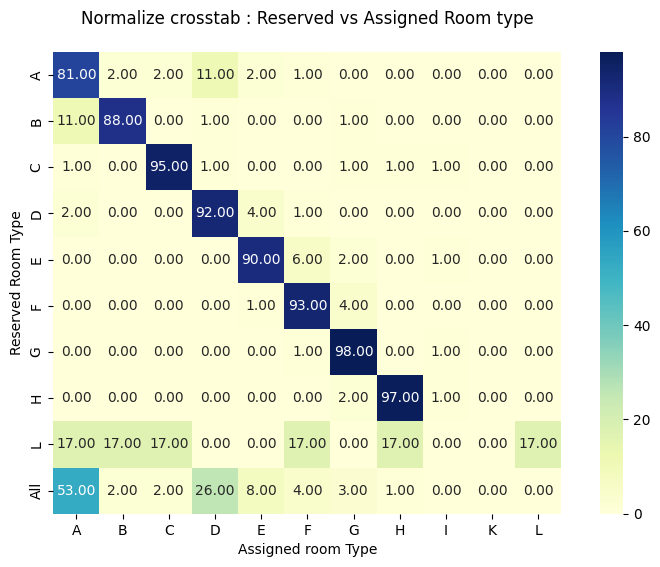

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 

pivot_normalization = pd.crosstab(index=df["reserved_room_type"],columns = df ["assigned_room_type"],margins=True,normalize='index').round(2)*100

plt.figure(figsize=(10,6))
ax = sns.heatmap(pivot_normalization,annot=True,fmt=".2f",cmap="YlGnBu",cbar=True,square= True)
plt.xlabel("Assigned room Type")
plt.ylabel("Reserved Room Type")

ax.set_title("Normalize crosstab : Reserved vs Assigned Room type",pad =20)
plt.show()

In [21]:
value_counts = df["market_segment"].value_counts()

figure = px.pie(names = value_counts.index ,
               values = value_counts.values,
               hole = 0.3)
figure.update_traces(
    textinfo = "percent+label",
    pull = [0.1,0],
    marker = dict (colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)
figure.update_layout(
    title="Market Segment Distribution",
    showlegend=False,  # Hide legend
    annotations=[
        dict(text='Market Segment', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin for title and labels
)

figure.show()

C:\Users\NILANJAN SARKAR\AppData\Local\Temp\ipykernel_22836\3067159720.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




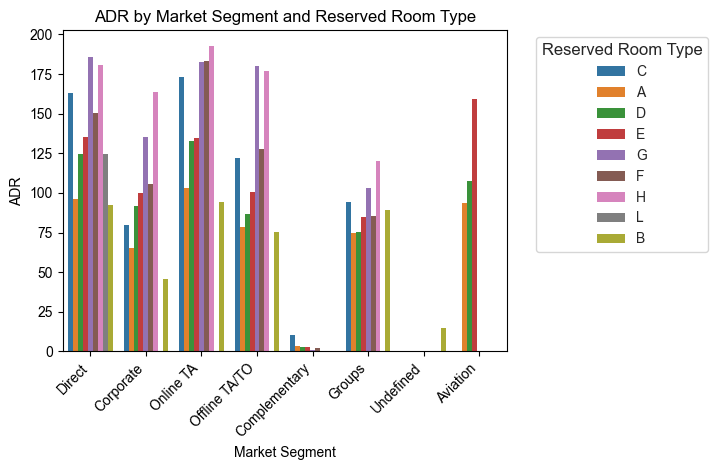

In [22]:
plt.Figure(figsize=(20,10))

figure = sns.barplot(x='market_segment', y='adr', hue='reserved_room_type', data=df, errorbar=None, dodge=True)

sns.set_style("whitegrid")

plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.title("ADR by Market Segment and Reserved Room Type")

plt.xticks(rotation=45, ha="right")

legend = plt.legend(title="Reserved Room Type", title_fontsize="12", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.subplots_adjust(right=0.8)
plt.show()